# MOOC Econometrics

## Training Exercise 3.1

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols

import numpy as np

%matplotlib inline

In [28]:
sp500 = pd.read_csv('TrainExer 3-1.txt', sep='\t', thousands=',', decimal='.')
sp500.head()

,Year,Index,Dividends,Riskfree,LogEqPrem,BookMarket,NTIS,DivPrice,EarnPrice,Inflation
0,1927,17.66,0.77,0.0317,0.280823,0.374689,0.073955,-3.133,-2.767,-0.021176
1,1928,24.35,0.85,0.0426,0.313824,0.259667,0.042639,-3.355,-2.870,-0.009793
2,1929,21.45,0.97,0.0303,-0.112428,0.338458,0.165576,-3.096,-2.589,0.001830
3,1930,15.34,0.98,0.0148,-0.288025,0.554745,0.131525,-2.751,-2.761,-0.060665
4,1931,8.12,0.82,0.0241,-0.563742,1.170732,-0.011032,-2.293,-2.589,-0.095711


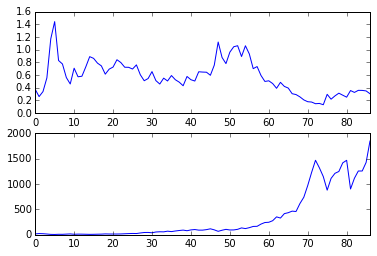

In [39]:
plt.subplot(2, 1, 1)
sp500.BookMarket.plot()

plt.subplot(2, 1, 2)
sp500.Index.plot()

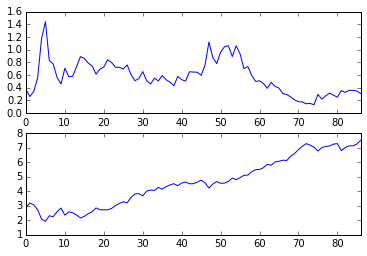

In [40]:
plt.subplot(2, 1, 1)
sp500.BookMarket.plot()

plt.subplot(2, 1, 2)
np.log(sp500.Index).plot()

In [61]:
part = sp500.Index[:5]
pd.DataFrame(data=[part, part.shift(), part - part.shift()]).T

,Index,Index,Index
0,17.66,NaN,NaN
1,24.35,17.66,6.69
2,21.45,24.35,-2.90
3,15.34,21.45,-6.11
4,8.12,15.34,-7.22


In [63]:
lag_log_index = np.log(sp500.Index) - np.log(sp500.Index).shift()

In [81]:
sp500['lag_log_index'] = lag_log_index

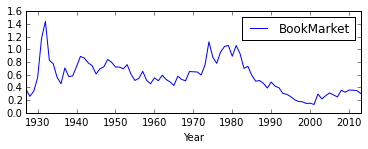

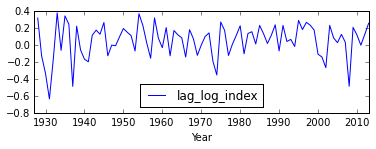

In [131]:
ax = plt.subplot(2, 1, 1)
sp500.plot(x='Year', y='BookMarket', ax=ax)
plt.show()

ax = plt.subplot(2, 1, 2)
sp500.plot(x='Year', y='lag_log_index', ax=ax)
plt.show()

Questions

** (a)** Use dataset TrainExer31 to regress the change in the log of the S&P500 index on a constant and the book-to-
market ratio, and check the result presented in Lecture 3.1 that
change in log(SP500 index) = 0.177 − 0.213 × Book-to-market + e.

In [92]:
model_a = ols("lag_log_index ~ BookMarket", data=sp500).fit()
model_a.params

Intercept     0.176952
BookMarket   -0.213316
dtype: float64

**(b)** Now regress the S&P500 index (without any kind of transformation) on a constant and the book-to-market
ratio. Consider whether the effect of book-to-market on the index is significant in this specification.

In [91]:
model_b = ols("Index ~ BookMarket", data=sp500).fit()
model_b.params

Intercept     1035.347310
BookMarket   -1217.680753
dtype: float64

The effect is significant

**(c)** Make a plot of the residuals $e$ from both question **(a)** and **(b)** and comment on the difference.

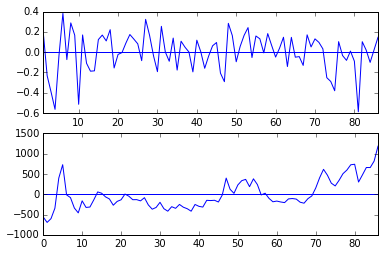

In [105]:
plt.subplot(2, 1, 1)
model_a.resid.plot()
plt.axhline(y=0)

plt.subplot(2, 1, 2)
model_b.resid.plot()
plt.axhline(y=0)

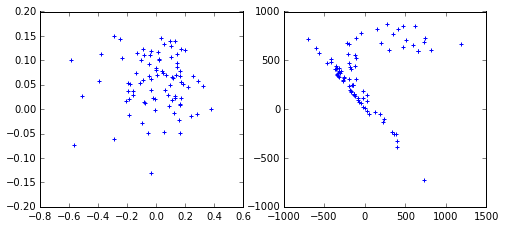

In [103]:
plt.figure(figsize=(8, 3.5))

plt.subplot(1, 2, 1)
plt.scatter(model_a.resid, model_a.fittedvalues, marker='+')

plt.subplot(1, 2, 2)
plt.scatter(model_b.resid, model_b.fittedvalues, marker='+')

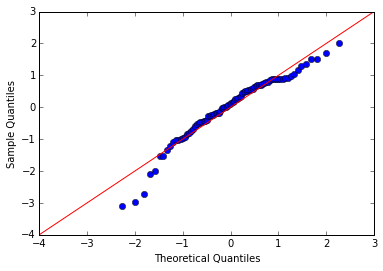

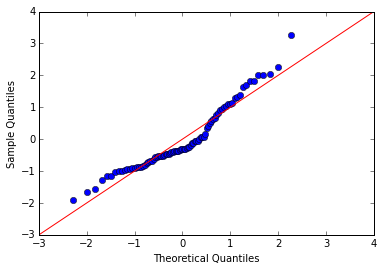

In [116]:
sm.graphics.qqplot(model_a.resid, fit=1, line='45')
plt.show()

sm.graphics.qqplot(model_b.resid, fit=1, line='45')
plt.show()

## Training Exercise 3.3

### Questions

**(a)** In Lecture 3.1 we took the first difference of the logarithmic transformed series. 

* These two transformations combined provide the interpretation of being an (approximate) growth rate. Show this. 
* Hint: Use the definition of the first difference, $\log(a) − \log(b) = \log(a/b)$, $\log(a/b) = \log(1 + (a − b)/b)$, and that $\log(1 + x) \approx x$ for small $x$.


**(b)** Use dataset `TrainExer33` to regress the change in the log of the S&P500 index on a constant, the book-to-market
ratio, and the square of the book-to-market ratio. 

Is the relationship between the index and book-to-market
quadratic?

In [125]:
model_3_b = ols("lag_log_index ~ BookMarket + I(BookMarket**2)", data=sp500).fit()
model_3_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          lag_log_index   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     5.050
Date:                Mon, 16 Nov 2015   Prob (F-statistic):            0.00852
Time:                        22:15:31   Log-Likelihood:                 22.599
No. Observations:                  86   AIC:                            -39.20
Df Residuals:                      83   BIC:                            -31.83
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              0.0563      0.089      0.633      0.528        -0.121     0.233
BookMarket             0.2368      0.287      0.825      0.412        -0.334     0.808
I(BookMarket ** 2)    -0.3467      0.213     -1.630      0.107        -0.770     0.076
==============================================================================
Omnibus:                       12.262   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.826
Skew:                          -0.856   Prob(JB):                      0.00164
Kurtosis:                       3.804   Cond. No.                         22.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

None of the variables is significant

(c) Define a dummy that is 1 for 1980 and all following years. Regress the change in the log of the S&P500 index on
a constant, the book-to-market ratio, and an interaction between the book-to-market ratio and the just-defined
dummy. Is the relationship between the index and book-to-market stable over the pre- and post-1980 period?

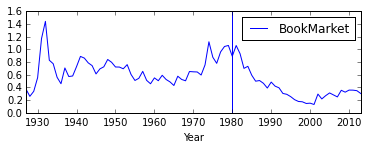

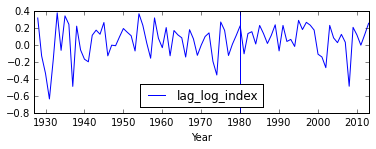

In [134]:
ax = plt.subplot(2, 1, 1)
sp500.plot(x='Year', y='BookMarket', ax=ax)
plt.axvline(x=1980)
plt.show()

ax = plt.subplot(2, 1, 2)
sp500.plot(x='Year', y='lag_log_index', ax=ax)
plt.axvline(x=1980)
plt.show()

In [136]:
sp500['after1980'] = sp500.Year >= 1980

In [139]:
model_3_c = ols("lag_log_index ~ BookMarket + I(BookMarket*after1980)", data=sp500).fit()
model_3_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          lag_log_index   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     3.778
Date:                Mon, 16 Nov 2015   Prob (F-statistic):             0.0269
Time:                        22:23:51   Log-Likelihood:                 21.408
No. Observations:                  86   AIC:                            -36.82
Df Residuals:                      83   BIC:                            -29.45
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept                     0.1661      0.054      3.094      0.003         0.059     0.273
BookMarket                   -0.2079      0.080     -2.603      0.011        -0.367    -0.049
I(BookMarket * after1980)     0.0486      0.086      0.563      0.575        -0.123     0.220
==============================================================================
Omnibus:                       12.842   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.822
Skew:                          -0.846   Prob(JB):                     0.000997
Kurtosis:                       3.999   Cond. No.                         5.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

coeff for the interaction term is not significant, so we do not reject $H_0$ that the relationship between $\Delta \log \text{Index}$ and B2M are stable over two perions: before 1980 and after

## Training Exercise 3.5

The variables are:

- Year
- Index: The S&P500 index
- Dividends: Dividends on the index (“D12” in the Goyal and Welch [GW] file)
- Riskfree: Riskfree rate (“Rfree” in GW)
- LogEqPrem: Log of the equity premium (calculated following GW 2 )
- BookMarket: Book to market ratio (“b/m” in GW)
- NTIS: Equity issued (“ntis” in GW)
- DivPrice: Dividend to price ratio (calculated following GW 3 )
- EarnPrice: Earnings to price ratio (calculated following GW 4 )
- Inflation: Inflation rate (“infl” in GW)

In [142]:
sp500 = pd.read_csv('TrainExer 3-5.txt', sep='\t', thousands=',', decimal='.')
sp500.head()

,Year,Index,Dividends,Riskfree,LogEqPrem,BookMarket,NTIS,DivPrice,EarnPrice,Inflation
0,1927,17.66,0.77,0.0317,0.280823,0.374689,0.073955,-3.133,-2.767,-0.021176
1,1928,24.35,0.85,0.0426,0.313824,0.259667,0.042639,-3.355,-2.870,-0.009793
2,1929,21.45,0.97,0.0303,-0.112428,0.338458,0.165576,-3.096,-2.589,0.001830
3,1930,15.34,0.98,0.0148,-0.288025,0.554745,0.131525,-2.751,-2.761,-0.060665
4,1931,8.12,0.82,0.0241,-0.563742,1.170732,-0.011032,-2.293,-2.589,-0.095711


**(a)** Replicate the $R^2$ values of slide 7 from lecture 3.5. 

- show that a regression of the log equity premium (the variable `LogEqPrem` in the data file) on a constant and all five explanatory variables gives $R^2 = 10.8\%$, 
- show that a regression of the log equity premium on a constant and only book-to-market gives $R^2 = 6.3\%$
- based on these values, argue whether the additional four variables are significant when comparing the full with the book-to-market only model.

In [144]:
model_5_a = ols("LogEqPrem ~ BookMarket + NTIS + DivPrice + EarnPrice + Inflation", data=sp500).fit()
model_5_a.rsquared

0.10848042824710857

In [145]:
model_5_a2 = ols("LogEqPrem ~ BookMarket", data=sp500).fit()
model_5_a2.rsquared

0.063347632077876193

Based on these values alone, it seems that four additional variables explain more variance in the data, so they must be significant

**(b)** Replicate the RESET statistic of slide 8 of Lecture 3.5. 

Proceed in the following steps:

- First regress the log equity premium on a constant and the book-to-market ratio. 
- Then store the fitted log equity premium based on the output from this regression. 
- Finally, regress the log equity premium on a constant, the book-to-market ratio, and the fitted log equity premium that was stored in the previous step. 

The RESET test statistic is the statistic of an $F$-test on the fitted log equity premium parameter.

In [197]:
model_5_a2 = ols("LogEqPrem ~ BookMarket", data=sp500).fit()
sp500['LogEqPremFitted'] = model_5_a2.fittedvalues
model_5_b = ols("LogEqPrem ~ BookMarket + I(LogEqPremFitted**2)", data=sp500).fit()

In [198]:
S_0 = np.sum(model_5_a2.resid ** 2)
S_1 = np.sum(model_5_b.resid ** 2)

n = len(sp500)
k = 2 # constant and BookMarket
p = 1
F = ((S_0 - S_1) / p) / (S_1 / (n - k - p))
F

3.445693725578586

**(c)** Replicate the Chow break statistic of slide 8 of Lecture 3.5. 

Proceed in the following steps.

- First regress the log equity premium on a constant and the book-to-market ratio and store the sum of squared residuals.
- Then perform the same regression for both the subsample of observations over 1927-1979, and the subsample of observations over 1980-2013. 
- For both regressions, store the sum of squared residuals. Use these sum of squared residuals to calculate the Chow break statistic.

In [173]:
model_full = ols("LogEqPrem ~ BookMarket", data=sp500).fit()
S_0 = np.sum(model_full.resid ** 2)

model_1 = ols("LogEqPrem ~ BookMarket", data=sp500[sp500.Year < 1980]).fit()
S_1 = np.sum(model_1.resid ** 2)

model_2 = ols("LogEqPrem ~ BookMarket", data=sp500[sp500.Year >= 1980]).fit()
S_2 = np.sum(model_2.resid ** 2)

n = len(sp500)
k = 2 # constant and BookMarket
F = ((S_0 - S_1 - S_2) / k) / ((S_1 + S_2) / (n - 2*k))
F

2.2687563489548737

**(d)** Replicate the Chow forecast statistic of slide 8 of Lecture 3.5. 

No new regression is required, you should be able to base this result on the regressions you have run so far. (Should get 0.765)

In [184]:
n2 = np.sum(sp500.Year >= 1980)
n1 = n - n2
F = ((S_0 - S_1) / n2) / (S_1 / (n1 - k))
F

0.7647605949093579